<a href="https://colab.research.google.com/github/matheusgneves/data-science-projects/blob/main/Pre%C3%A7os_de_Im%C3%B3veis_Utilizando_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando uma reta

## Conhecendo os dados

In [ ]:
#Lendo dados
import pandas as pd
dados = pd.read_csv('/content/Preços_de_casas.csv')

In [ ]:
#Quais fatores coletados?
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
dados = dados.drop(columns="Id")

## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



In [ ]:
# Correlação
corr = dados.corr()
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


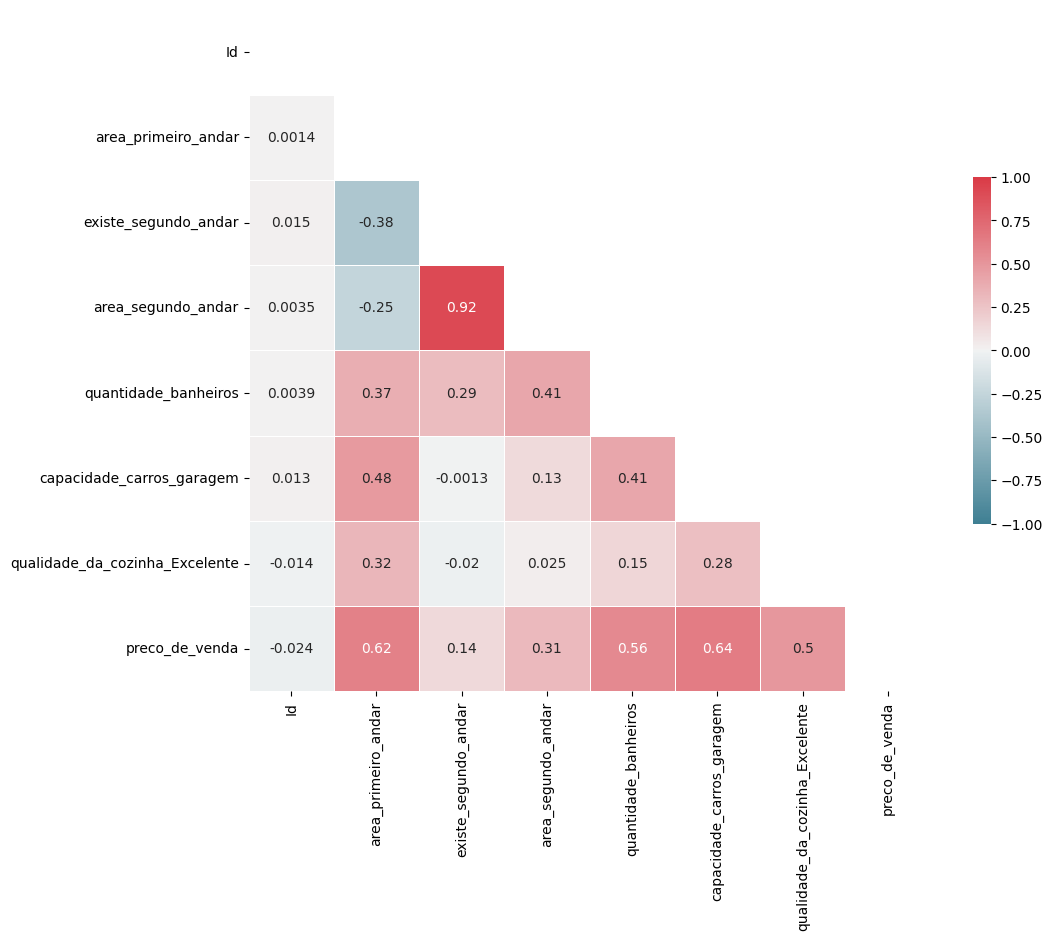

In [ ]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo dados
dados = pd.read_csv("/content/Preços_de_casas.csv")

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

## Relacionando variáveis

In [ ]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

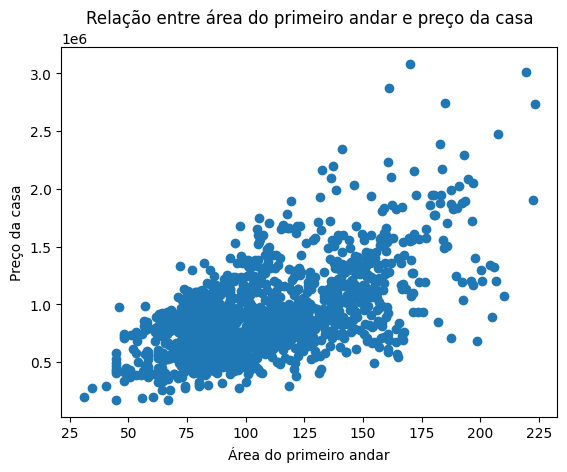

In [ ]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre área do primeiro andar e preço da casa')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço da casa')
plt.show()

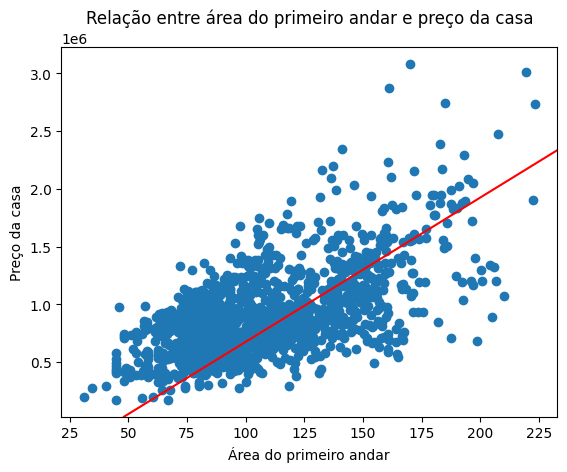

In [ ]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color='red')

plt.title('Relação entre área do primeiro andar e preço da casa')
plt.xlabel('Área do primeiro andar')
plt.ylabel('Preço da casa')
plt.show()

## Melhor reta

In [ ]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x='area_primeiro_andar', y='preco_de_venda',
           trendline_color_override="red", trendline="ols")


# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

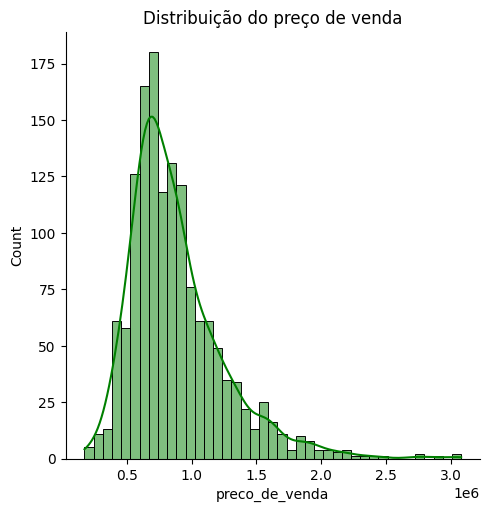

In [ ]:
#Quem é nossa variável resposta?
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Definindo y e X
y = dados['preco_de_venda']
x = dados.drop(columns='preco_de_venda')

In [ ]:
#Aplicando o split do y e X
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [ ]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(x_train)
df_train['preco_de_venda'] = y_train
df_train.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
1303,1324,65.7732,0,0.0000,1,0,0,406725.0
326,330,55.3684,1,55.3684,1,189,0,384540.0
386,392,74.6916,1,107.4853,2,560,0,1059950.0
615,626,103.6764,0,0.0000,1,440,0,788800.0
236,238,94.2006,1,67.8170,2,457,0,958885.0


In [ ]:
# import ols
from statsmodels.formula.api import ols

In [ ]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

## Analisando os coeficientes

(intensidade, direção e significância)




In [ ]:
# visualizando os parametros
modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


In [ ]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 07 Sep 2025   Prob (F-statistic):          2.22e-105
Time:                        19:27:13   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [ ]:
# observando o R²
modelo_0.rsquared

np.float64(0.37728010994297867)

## Entendendo o resíduo

In [ ]:
# Quem são os residuos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


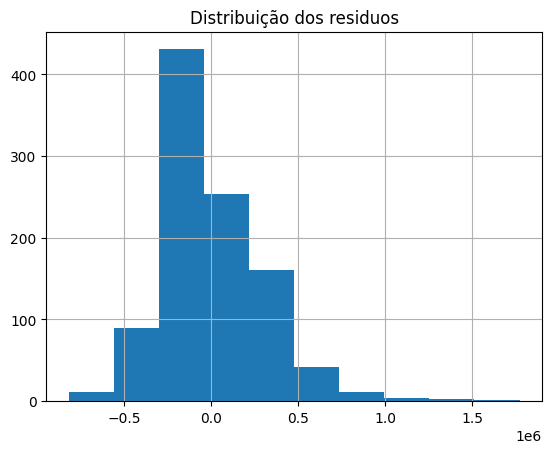

In [ ]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title('Distribuição dos residuos')
plt.show()

![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [ ]:
# definindo o Y previsto
y_predict = modelo_0.predict(x_test)

In [ ]:
# importando o r2_score
from sklearn.metrics import r2_score

In [ ]:
# printando o r²
print('R²: ', r2_score(y_test, y_predict))

R²:  0.38530928723202407


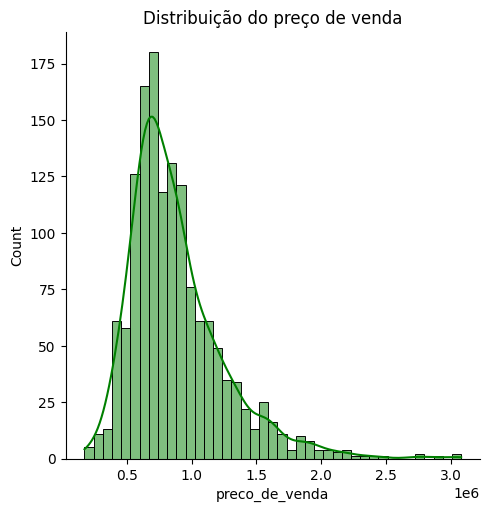

In [ ]:
sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

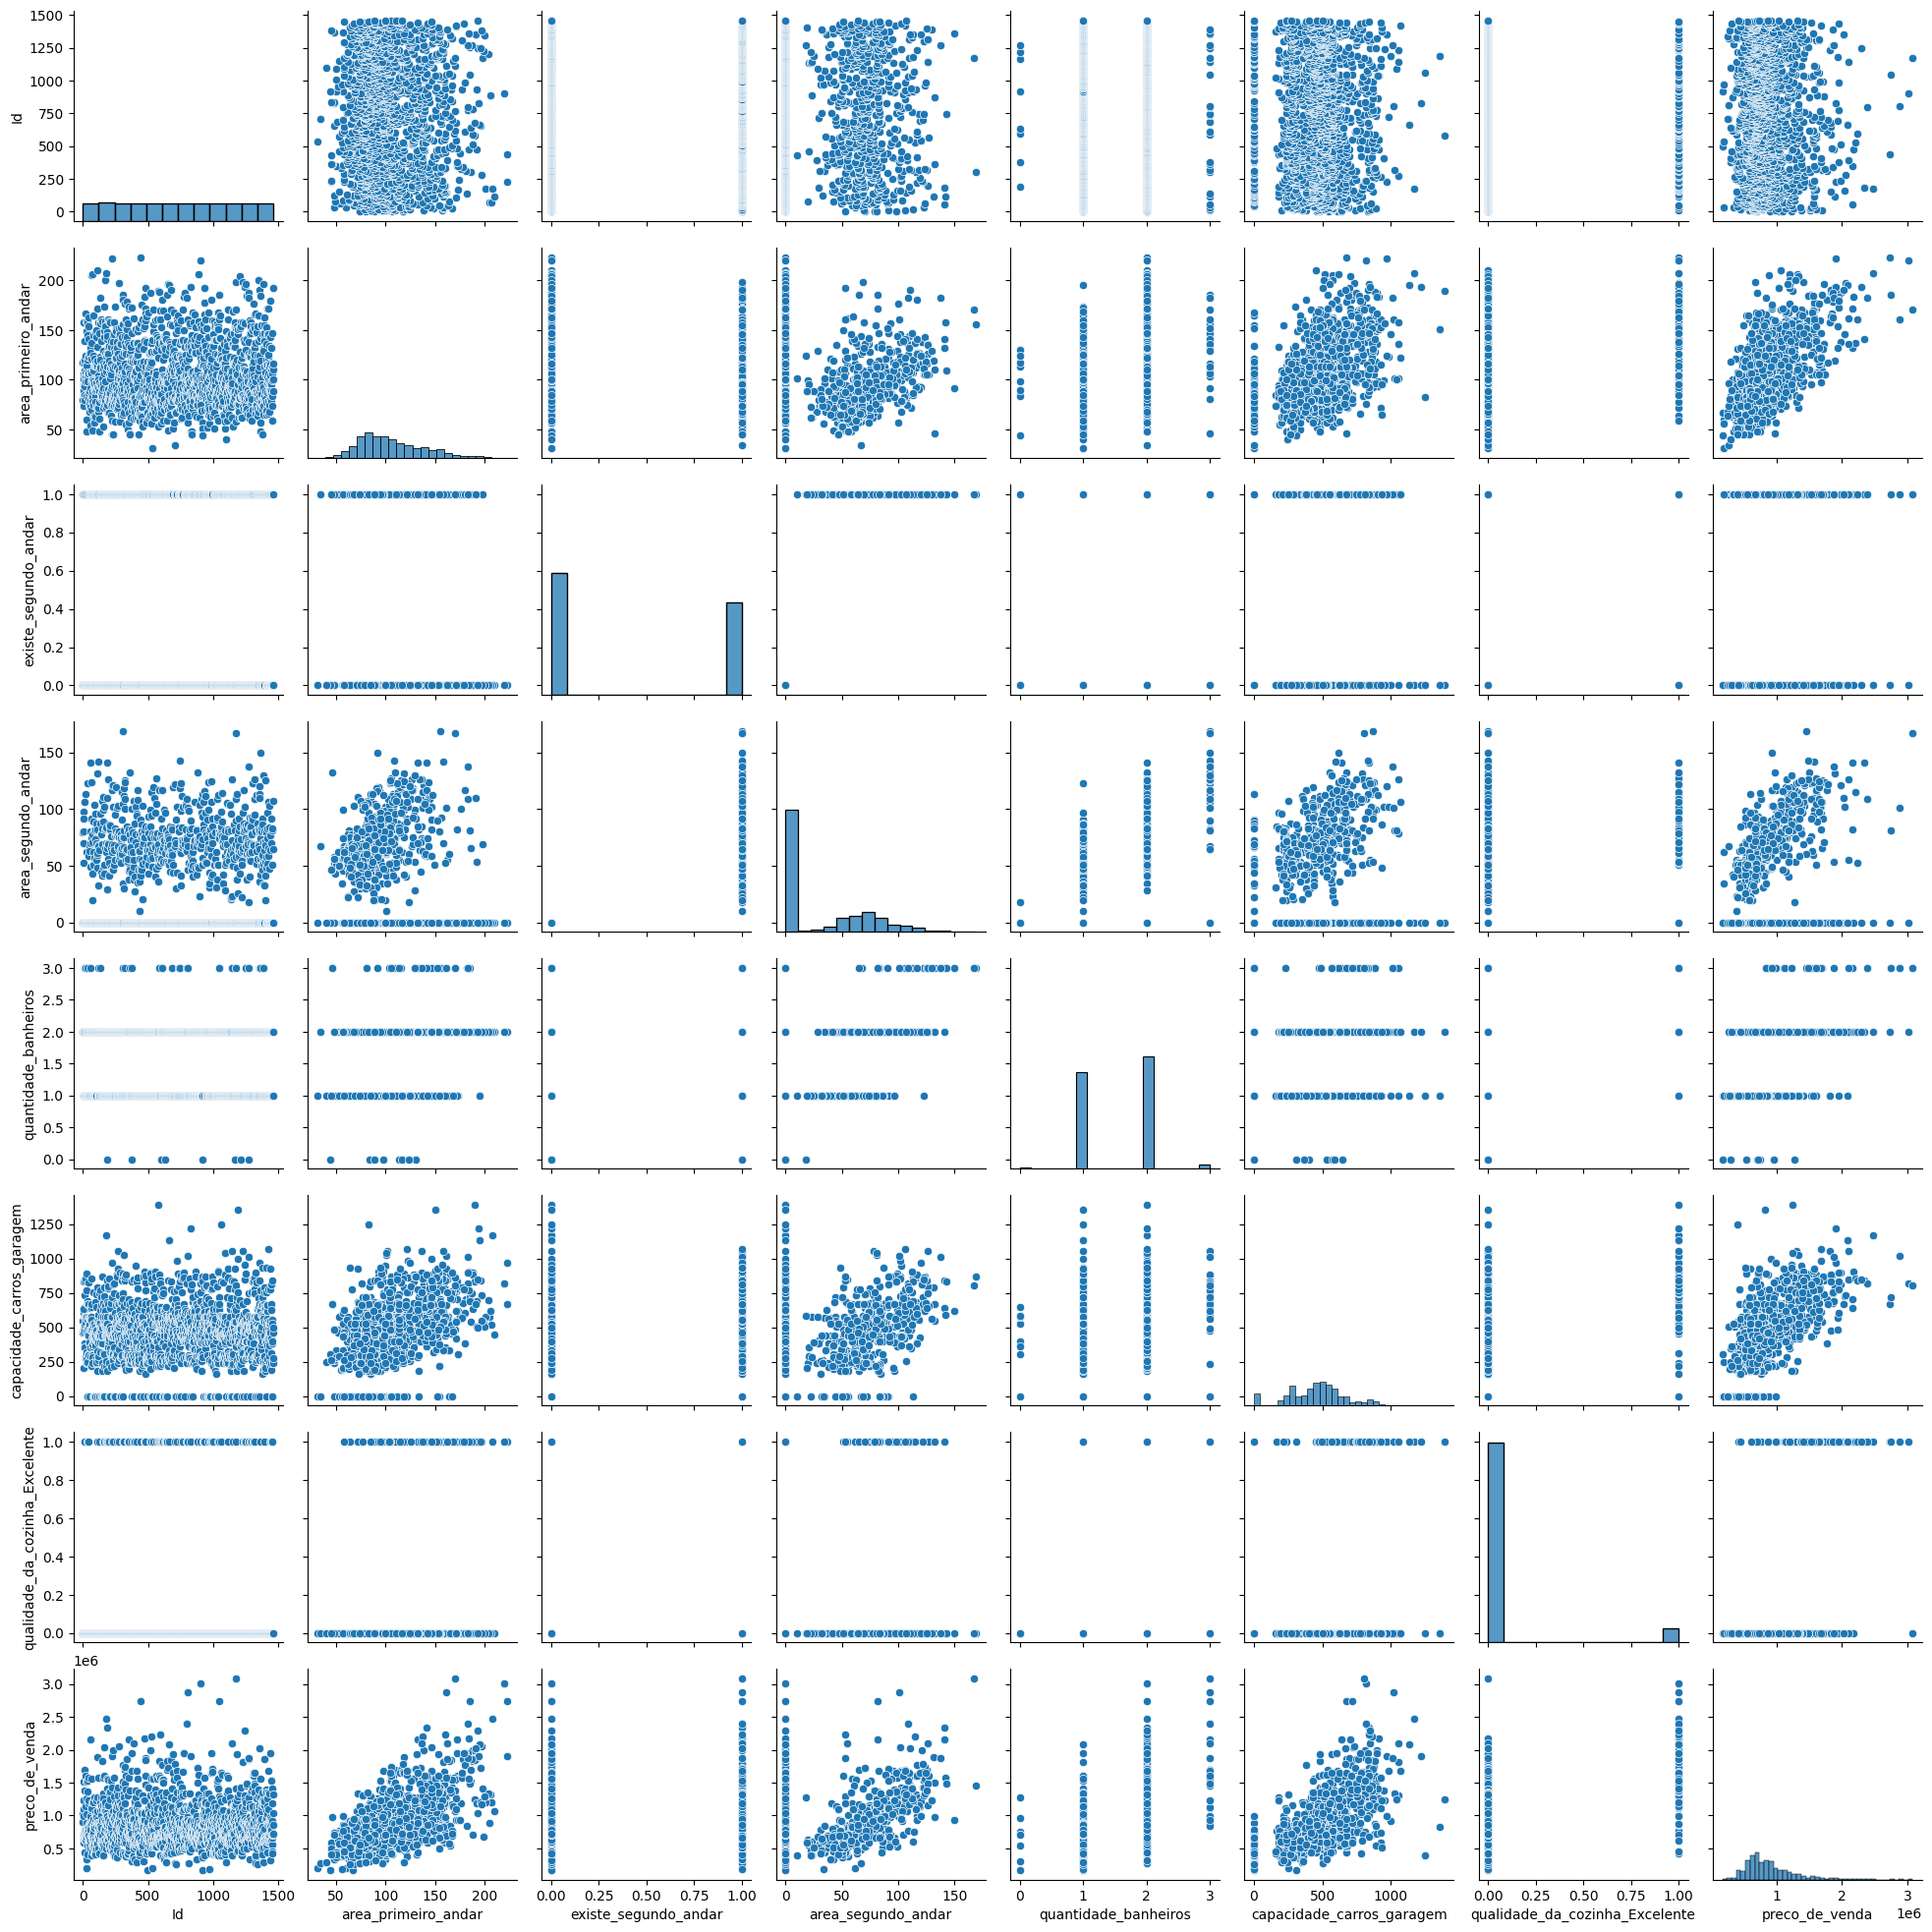

In [ ]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [ ]:
dados.columns

Index(['Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente',
       'preco_de_venda'],
      dtype='object')

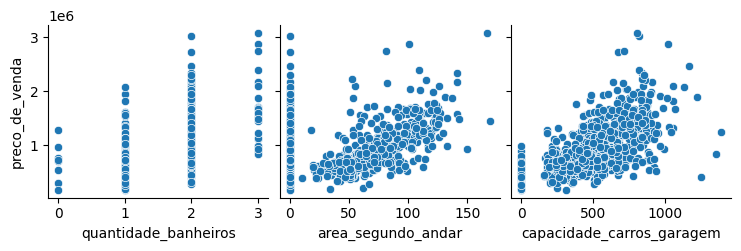

In [ ]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [ ]:
# importando a api do statsmodels
import statsmodels.api as sm

In [ ]:
# adicionando o constante
x_train = sm.add_constant(x_train)

In [ ]:
x_train.columns

Index(['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  x_train[['area_primeiro_andar',
                          'existe_segundo_andar',
                          'area_segundo_andar',
                          'quantidade_banheiros',
                          'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  x_train[['area_primeiro_andar',
                          'existe_segundo_andar',
                          'quantidade_banheiros',
                          'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  x_train[['area_primeiro_andar',
                          'existe_segundo_andar',
                          'area_segundo_andar',
                          'quantidade_banheiros',
                          'qualidade_da_cozinha_Excelente']]).fit()

In [ ]:
# Resumo do modelo 1
print(modelo_1.summary())

                                 OLS Regression Results                                
Dep. Variable:         preco_de_venda   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              4103.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):                        0.00
Time:                        19:27:24   Log-Likelihood:                         -13642.
No. Observations:                1006   AIC:                                  2.730e+04
Df Residuals:                    1000   BIC:                                  2.733e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
# Resumo do modelo 2
print(modelo_2.summary())

                                 OLS Regression Results                                
Dep. Variable:         preco_de_venda   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              4248.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):                        0.00
Time:                        19:27:24   Log-Likelihood:                         -13714.
No. Observations:                1006   AIC:                                  2.744e+04
Df Residuals:                    1001   BIC:                                  2.746e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
# Resumo do modelo 3
print(modelo_3.summary())

                                 OLS Regression Results                                
Dep. Variable:         preco_de_venda   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              4259.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):                        0.00
Time:                        19:27:24   Log-Likelihood:                         -13713.
No. Observations:                1006   AIC:                                  2.744e+04
Df Residuals:                    1001   BIC:                                  2.746e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Comparando modelos
Qual o melhor modelo?


In [ ]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.960966169399434
Modelo 2:  0.954992192554043
Modelo 3:  0.9551002686367526


In [ ]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
6
5
5


In [ ]:
modelo_3.params

,0
area_primeiro_andar,5808.141741
existe_segundo_andar,-196796.915461
area_segundo_andar,5823.860721
quantidade_banheiros,86198.248522
qualidade_da_cozinha_Excelente,433143.534556


# 4. Precificando as casas

## Obtendo o R² da previsão

In [ ]:
# Adicionando uma constante em X_test
x_test = sm.add_constant(x_test)
x_test.columns

Index(['const', 'Id', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [ ]:
# Prevendo com o modelo 3
modelo_3.params

predict_3 = modelo_3.predict(x_test[['const',
                            'area_primeiro_andar',
                            'existe_segundo_andar',
                            'quantidade_banheiros',
                            'qualidade_da_cozinha_Excelente']])

In [ ]:
# Qual o r² da previsão?
modelo_3.rsquared


np.float64(0.9551002686367526)

In [ ]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_3))


R²:  -3729.394918149343


## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [ ]:
#Novo imovel
novo_imovel = pd.DataFrame({'const': [1],
                            'area_primeiro_andar': [120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]})

In [ ]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,968146.285305


In [ ]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_3.predict(novo_imovel)[0])

-23431601.35586815


## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Lendo várias casas?
novas_casas = pd.read_csv('/content/Novas_casas.csv', sep=';')

In [ ]:
#novas_casas = novas_casas.drop(columns='Casa')
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [ ]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)

In [ ]:
# Qual o preço dessas novas casas?
modelo_0.predict(novas_casas)

,0
0,1.171956e+06
1,1.375765e+06
2,9.681463e+05
3,1.511638e+06
4,1.239892e+06
5,1.104019e+06
6,1.307828e+06
7,1.443701e+06
8,1.036083e+06
9,1.375765e+06


In [ ]:
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
with open(nome_arquivo, 'wb') as arquivo:
    pickle.dump(modelo_3, arquivo)

In [ ]:
# Carregar o modelo de volta do arquivo
with open(nome_arquivo, 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [ ]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1['vif'] = [variance_inflation_factor(x_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [ ]:
vif_1

,variavel,vif
0,const,20.230833
1,area_primeiro_andar,2.193680
2,existe_segundo_andar,7.455059
3,area_segundo_andar,7.589396
4,quantidade_banheiros,1.720795
5,capacidade_carros_garagem,1.570078
6,qualidade_da_cozinha_Excelente,1.182606


In [ ]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3['vif'] = [variance_inflation_factor(x_train[explicativas_3], i) for i in range(len(explicativas_3))]

In [ ]:
vif_3

,variavel,vif
0,const,18.773457
1,area_primeiro_andar,1.919046
2,existe_segundo_andar,1.644067
3,quantidade_banheiros,1.539255
4,qualidade_da_cozinha_Excelente,1.151795


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [ ]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3])


In [ ]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
# Residuos
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

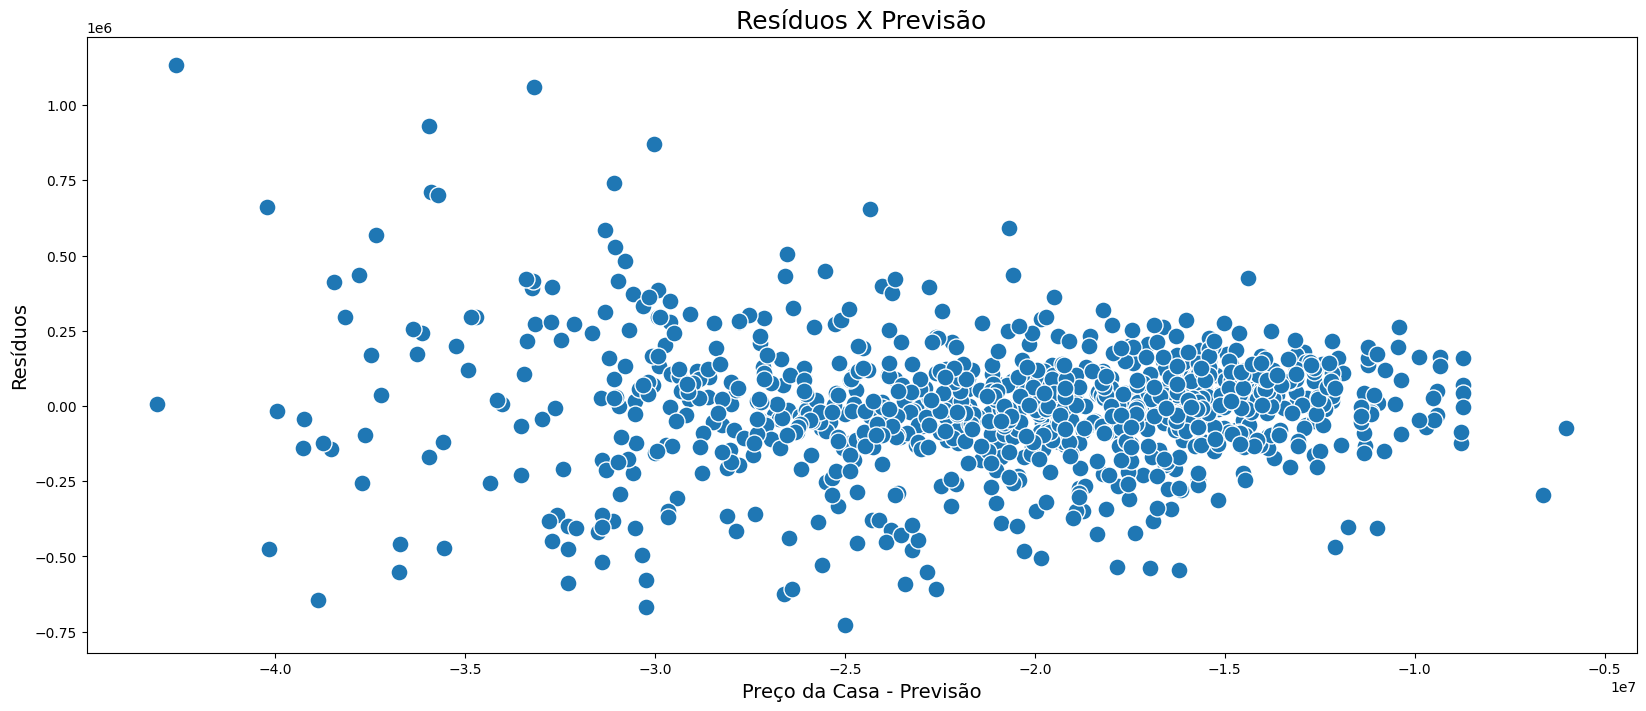

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

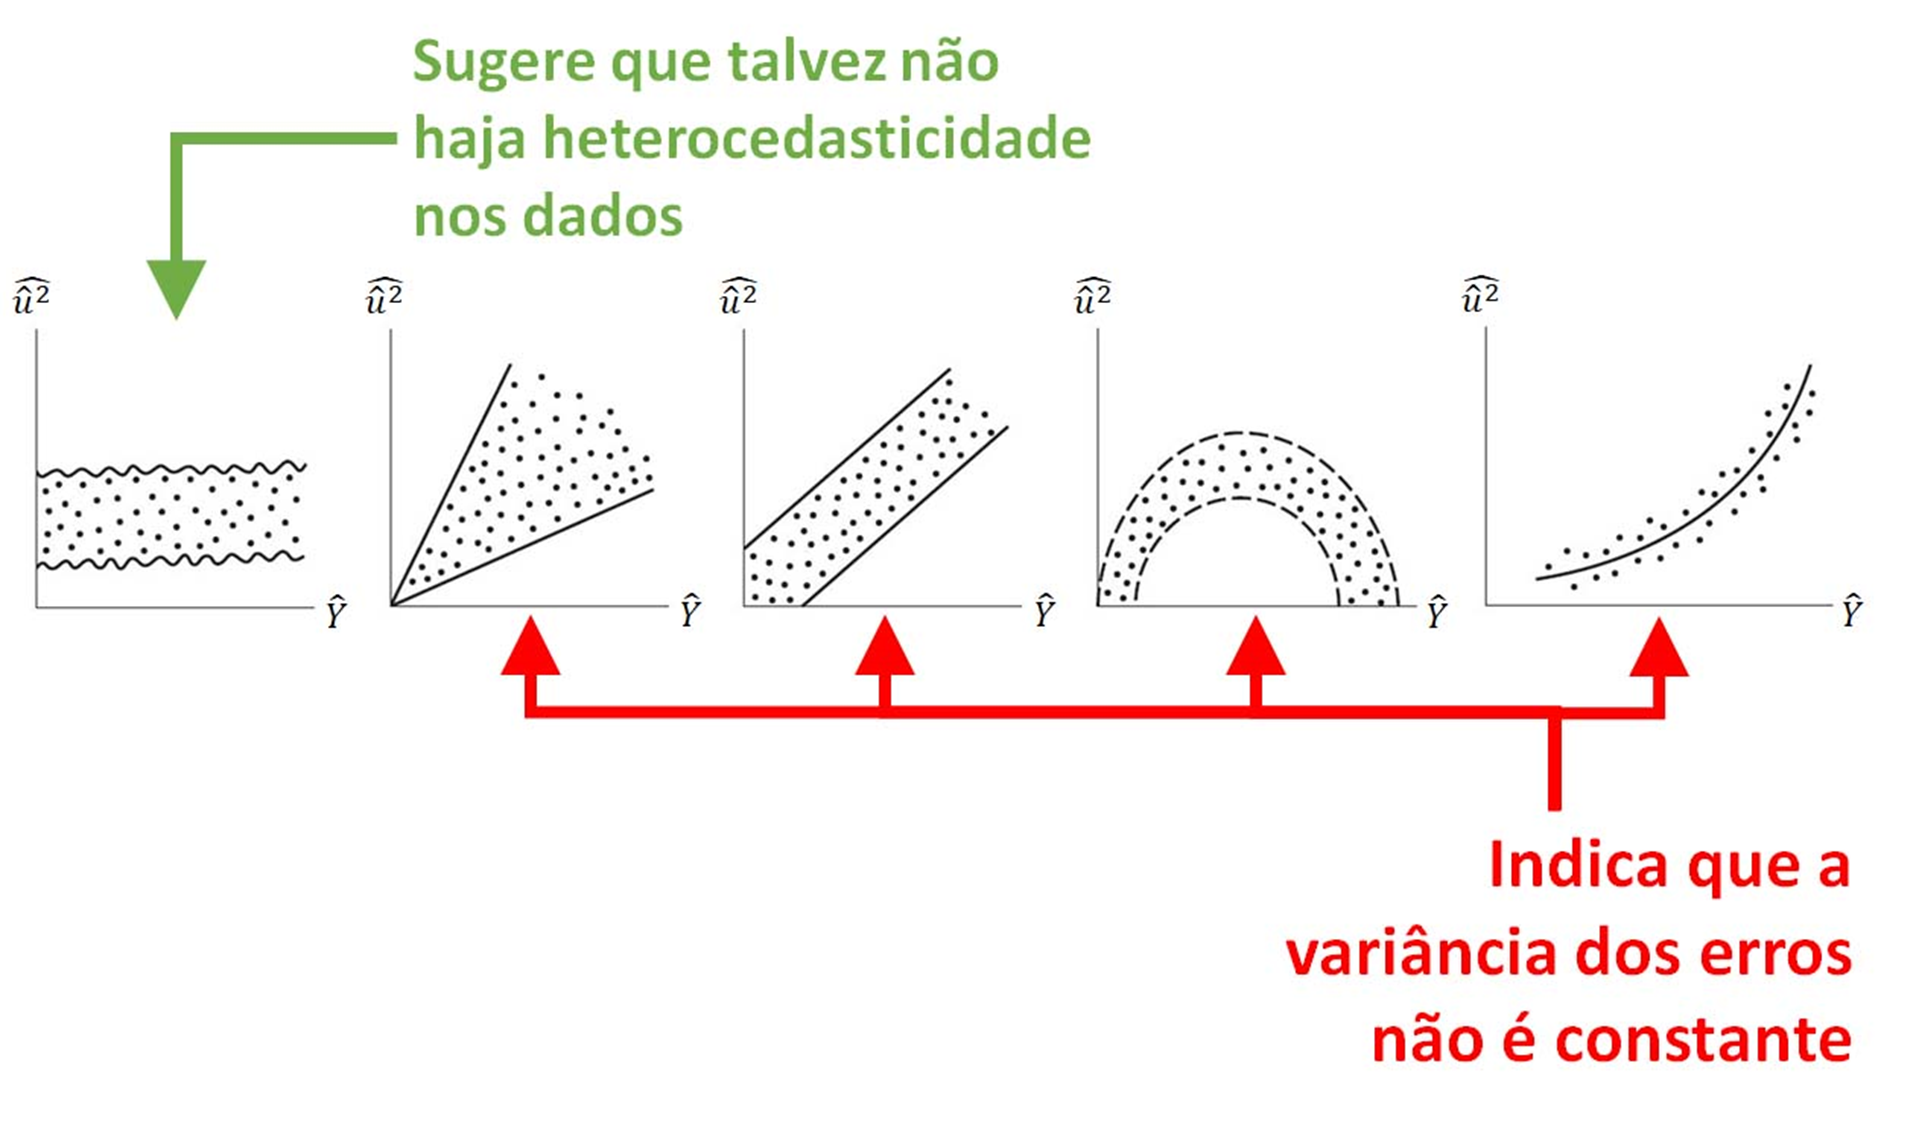